In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [57]:
SPY = pd.read_csv('SPY.csv')
SPY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,384.369995,386.429993,377.829987,380.820007,376.639587,74850700
1,2023-01-04,383.179993,385.880005,380.000000,383.760010,379.547333,85934100
2,2023-01-05,381.720001,381.839996,378.760010,379.380005,375.215393,76970500
3,2023-01-06,382.609985,389.250000,379.410004,388.079987,383.819855,104189600
4,2023-01-09,390.369995,393.700012,387.670013,387.859985,383.602295,73978100
...,...,...,...,...,...,...,...
207,2023-10-30,413.559998,416.679993,412.220001,415.589996,415.589996,86562700
208,2023-10-31,416.179993,418.529999,414.209991,418.200012,418.200012,79665200
209,2023-11-01,419.200012,423.500000,418.649994,422.660004,422.660004,98068100
210,2023-11-02,426.579987,430.920013,426.559998,430.760010,430.760010,94938900


In [58]:
SPY = SPY.set_index(pd.DatetimeIndex(SPY['Date'].values))
SPY

,Date,Open,High,Low,Close,Adj Close,Volume
2023-01-03,2023-01-03,384.369995,386.429993,377.829987,380.820007,376.639587,74850700
2023-01-04,2023-01-04,383.179993,385.880005,380.000000,383.760010,379.547333,85934100
2023-01-05,2023-01-05,381.720001,381.839996,378.760010,379.380005,375.215393,76970500
2023-01-06,2023-01-06,382.609985,389.250000,379.410004,388.079987,383.819855,104189600
2023-01-09,2023-01-09,390.369995,393.700012,387.670013,387.859985,383.602295,73978100
...,...,...,...,...,...,...,...
2023-10-30,2023-10-30,413.559998,416.679993,412.220001,415.589996,415.589996,86562700
2023-10-31,2023-10-31,416.179993,418.529999,414.209991,418.200012,418.200012,79665200
2023-11-01,2023-11-01,419.200012,423.500000,418.649994,422.660004,422.660004,98068100
2023-11-02,2023-11-02,426.579987,430.920013,426.559998,430.760010,430.760010,94938900


<function matplotlib.pyplot.show(close=None, block=None)>

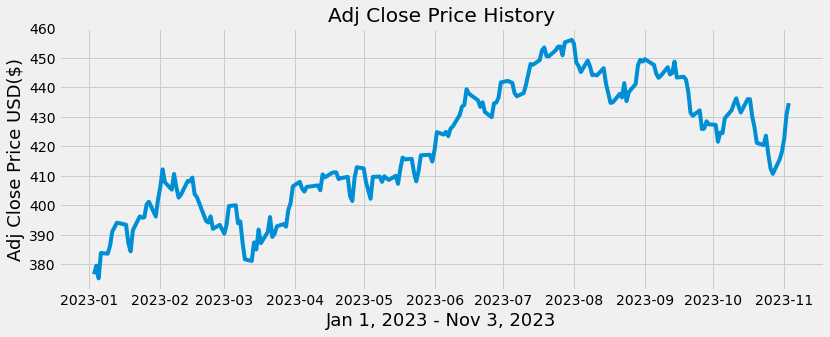

In [59]:
plt.figure(figsize=(12.2,4.5))
plt.plot(SPY.index, SPY['Adj Close'],label = 'Adj Close Price')
plt.title ('Adj Close Price History')
plt.xlabel ('Jan 1, 2023 - Nov 3, 2023', fontsize = 18)
plt.ylabel ('Adj Close Price USD($)', fontsize = 18)
plt.show

In [60]:
delta = SPY['Adj Close'].diff(1)
delta = delta.dropna()
delta

2023-01-04    2.907746
2023-01-05   -4.331940
2023-01-06    8.604462
2023-01-09   -0.217560
2023-01-10    2.690124
                ...   
2023-10-30    4.910003
2023-10-31    2.610016
2023-11-01    4.459992
2023-11-02    8.100006
2023-11-03    3.929992
Name: Adj Close, Length: 211, dtype: float64

In [61]:
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

In [62]:
period = 14

AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

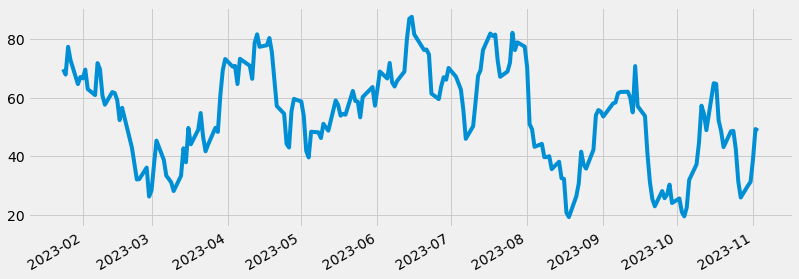

In [63]:
RS = AVG_Gain / AVG_Loss
RSI = 100-(100/(1+RS))
RSI = RSI

plt.figure(figsize = (12.2,4.5))
RSI.plot()
plt.show()

In [69]:
new_df = pd.DataFrame()
new_df['Adj Close'] = SPY['Adj Close']
new_df['RSI'] = RSI
new_df= new_df.dropna()
new_df

,Adj Close,RSI
2023-01-24,395.806824,69.711146
2023-01-25,395.955200,67.888720
2023-01-26,400.306915,77.344307
2023-01-27,401.226685,72.786187
2023-01-30,396.192535,64.635524
...,...,...
2023-10-30,415.589996,30.157080
2023-10-31,418.200012,31.350385
2023-11-01,422.660004,39.082984
2023-11-02,430.760010,49.343049


([<matplotlib.axis.YTick at 0x14a73bb3160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

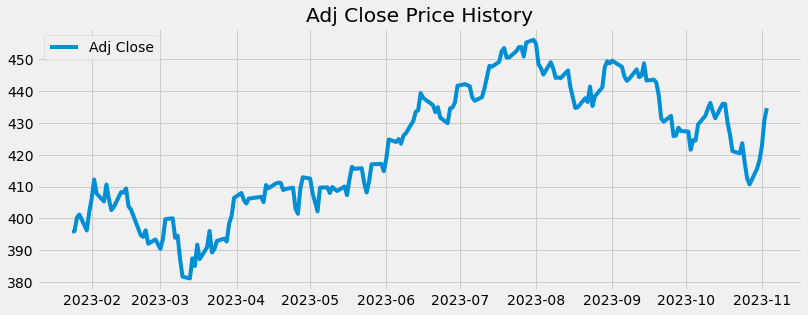

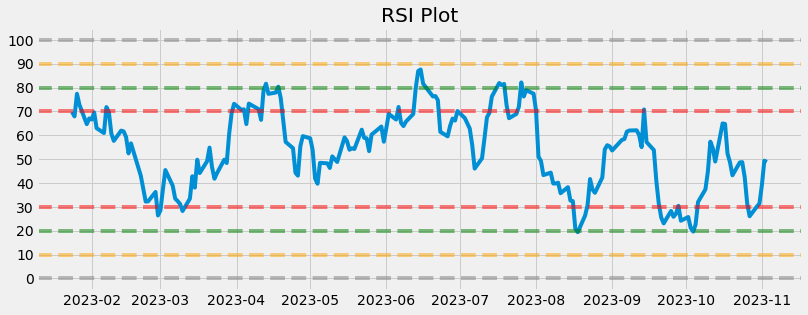

In [70]:
#plot adj close prices
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index,new_df['Adj Close'])
plt.title('Adj Close Price History')
plt.legend(new_df.columns.values, loc ='upper left')
plt.show

#plot corresponding RSI values and significant levels
plt.figure(figsize=(12.2,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index,new_df['RSI'])
plt.axhline(0,linestyle ='--', alpha = 0.5, color = 'gray' )
plt.axhline(10,linestyle ='--', alpha = 0.5, color = 'orange' )
plt.axhline(20,linestyle ='--', alpha = 0.5, color = 'green' )
plt.axhline(30,linestyle ='--', alpha = 0.5, color = 'red' )
plt.axhline(70,linestyle ='--', alpha = 0.5, color = 'red' )
plt.axhline(80,linestyle ='--', alpha = 0.5, color = 'green' )
plt.axhline(90,linestyle ='--', alpha = 0.5, color = 'orange' )
plt.axhline(100,linestyle ='--', alpha = 0.5, color = 'gray' )
plt.yticks([0, 10, 20, 30, 40, 50,60,70,80,90,100])